Wine Quality Prediction 


Dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset =pd.read_csv("winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.shape

(1599, 12)

In [4]:
# check messing data
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data analysis and visualization

In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


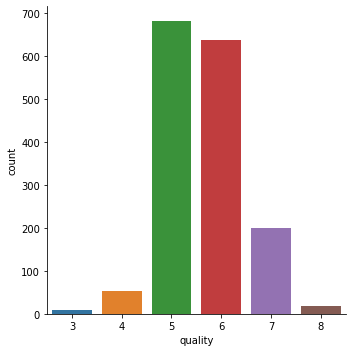

In [8]:
sns.catplot(x='quality',data=dataset,kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

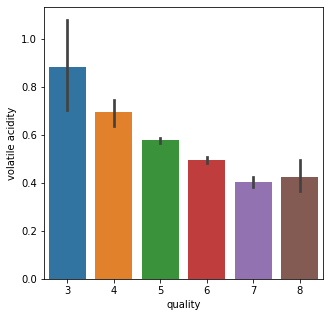

In [9]:
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity', data=dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

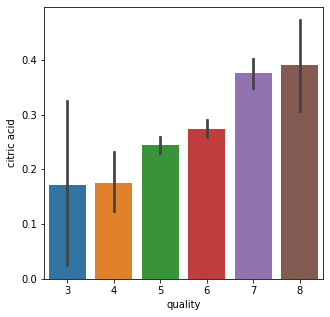

In [10]:
plot =plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid', data=dataset)

In [11]:
corr=dataset.corr()

<AxesSubplot:>

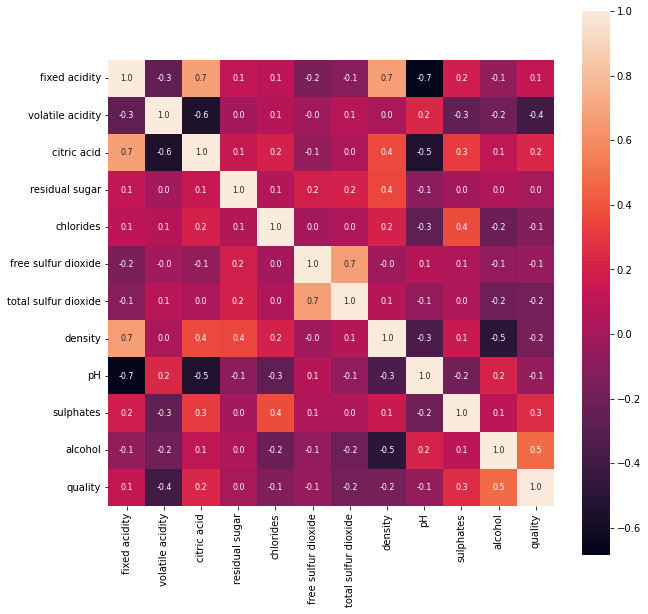

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,fmt='.1f',square=True,annot=True,annot_kws={'size':8})

Data Preprocessing

In [13]:
X=dataset.drop('quality',axis=1)

In [14]:
# one hot encoding
Y=dataset['quality'].apply(lambda v:1 if v>=7 else 0)

In [15]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [16]:
# Train & Test Split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [17]:
# Model Training 
model=RandomForestClassifier()


In [18]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [20]:
train_pred=model.predict(X_train)
train_acc=accuracy_score(train_pred,Y_train)
train_acc

1.0

In [21]:
test_pred=model.predict(X_test)
test_acc=accuracy_score(test_pred,Y_test)
test_acc

0.934375

In [22]:
# predict new data
in_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
data=np.asarray(in_data)
data=data.reshape(1,-1)

pred=model.predict(data)

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
pred

array([1], dtype=int64)